## データの取得・確認

In [10]:
import sys

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from termcolor import cprint

from common.module.evaluation import score


iris = datasets.load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_target = pd.Series(data=iris.target, name='target')

X_train, X_test, y_train, y_test = model_selection.train_test_split(iris_data, iris_target)

cprint('Iris Data (samples: {}, features: {})'.format(*iris_data.shape), 'blue', attrs=['bold'])
cprint('Iris Target (samples: {})'.format(*iris_target.shape), 'blue', attrs=['bold'])

Iris Data (samples: 150, features: 4)
Iris Target (samples: 150)


In [11]:
iris_data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [12]:
iris_target.unique()

array([0, 1, 2])

|  データセット  |  説明  |
| ---- | ---- |
|  sepal length (cm)  |  がく片の長さ  |
|  sepal width (cm)  |  がく片の幅  |
|  petal length (cm)  |  花弁の長さ  |
|  petal width (cm)  |  花弁の幅  |
|  target  |  目的変数／(setosa: 0, versicolor: 1, virginica: 2)  |

## データの可視化

LinAlgError: singular matrix

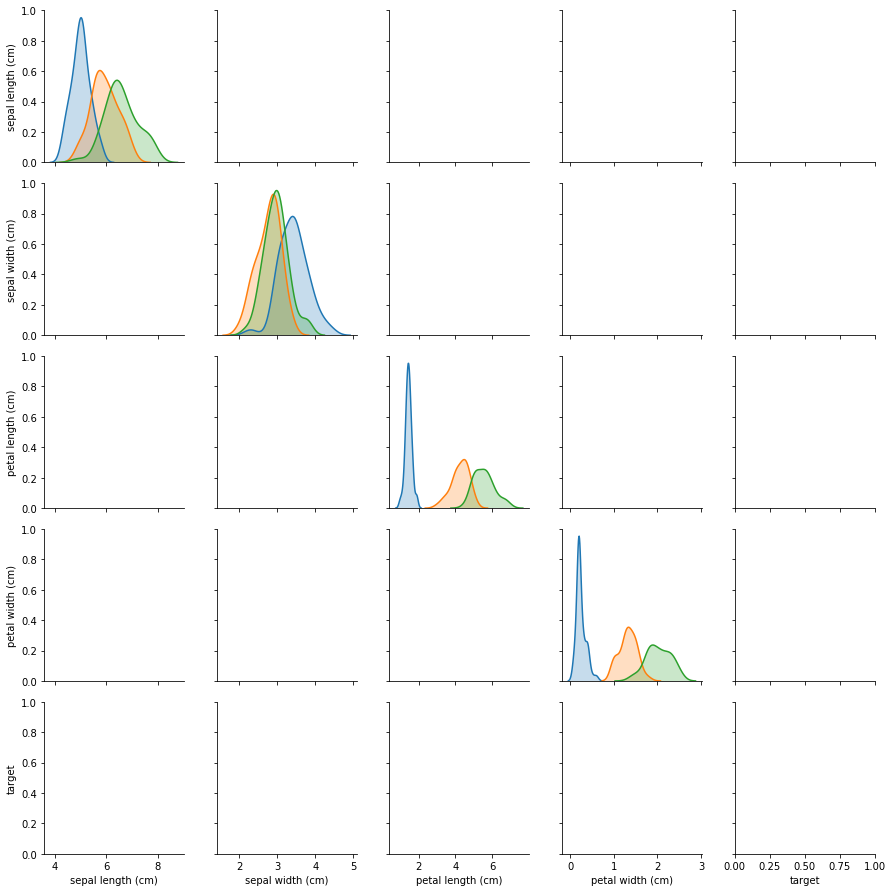

In [13]:
import seaborn as sns
df_concat = pd.concat([iris_data, iris_target], axis=1)
sns.pairplot(df_concat, hue='target')

## モデルの構築・訓練

In [6]:
class KNeighborsClassifier(object):
    """k最近傍法."""
    
    
    def __init__(self):
        pass
    
    
    def fit(self, X, y):
        """訓練データで学習する.
        
        ---パラメータ-------
        X: 訓練データセット
        y: ターゲット
        --------------------
        
        ---属性-----------------------------------------------
        _X_train: 保存後（kNNは訓練しない）の訓練データセット
        _y_train: 保存後（kNNは訓練しない）のターゲット
        ------------------------------------------------------
        
        """
        self._X_train = X
        self._y_train = y
        
    
    def predict(self, X):
        """クラスラベルを予測する.
        
        X: テストデータセット
        """    
        classlabels = []
        for p0 in X.values:
            distances = []
            for p1 in self._X_train.values:
                # 訓練データとテストデータのユークリッド距離を計算
                distance = self.cal_eu_dist(p0, p1)
                distances.append(distance)
                
            # ユークリッド距離の一番小さいものを該当クラスに分類する
            nearest_index = np.array(distances).argmin()
            classlabels.append(self._y_train.values[nearest_index])
            
        return classlabels

    
    def cal_eu_dist(self, p0, p1):
        """p0とp1のユークリッド距離を計算する."""
        return np.sqrt(np.sum((p0 - p1) ** 2, axis=0))

In [7]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

## 予測・評価

In [8]:
predict = pd.DataFrame(knn.predict(X_train), columns=['target'])
predict.head()

,target
0,1
1,0
2,0
3,1
4,0


In [9]:
train_score = score(predict, y_train)
test_score = score(pd.DataFrame(knn.predict(X_test), columns=['target']), y_test)
cprint('train_score: {}\ntest_score: {}'.format(train_score, test_score), 'red', attrs=['bold'])

train_score: 1.0
test_score: 0.9736842105263158
